In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [2]:
class tank_:
    def __init__(self):
        self.x, self.y = [], []
        self.waypoint_x, self.waypoint_y = [], []
        self.alpha = np.degrees(30)
        self.v = 30
        self.l_rls = 20
        self.l_paf = 5
        self.dmg = 100
        self.health = 1000
        self.reload = 5

class ATS_:
    def __init__(self):
        self.x, self.y = [], []
        self.waypoint_x, self.waypoint_y = [], []
        self.alpha = np.degrees(50)
        self.v = 50
        self.l_rls = 30
        self.l_paf = 5
        self.dmg = 400
        self.health = 300
        self.reload = 10

class battlefiend_:
    def __init__(self, deep = 1):
        self.n = 2
        self.dct = {
            'Видимость': 1,
            'Влажность': 0,
            'Температура': 273
        }
        self.r_step = None
        self.end_x, self.end_y = None, None
        self.r_start = None
        self.r = []
        self.x, self.y = [], []

    def create_geom(self):
        self.l, self.w = 100, 100
        self.start_x, self.start_y = self.l/2 + random.randint(0, 10), self.w/2 + random.randint(0, 10)
        self.r_start = random.randint(round(self.l*4/10), round(self.l/2))
        self.r_step = random.randint(10, 30)

        self.r.append(self.r_start)
        self.x.append(self.start_x)
        self.y.append(self.start_y)

        for i in range(self.n):
            self.r.append(self.r[-1] - random.randint(10, 15))
            self.x.append(self.x[-1] + random.randint(-5, 5))
            self.y.append(self.y[-1] + random.randint(-5, 5))

    def generate(self):
        self.spawn_x_1 = random.randint(0, self.l)
        self.spawn_y_1 = random.randint(0, self.l)
        self.spawn_x_2 = random.randint(0, self.l)
        self.spawn_y_2 = random.randint(0, self.l)

In [3]:
class figth_:
    def __init__(self, tank, ATS, battlefield):
        self.tank = tank
        self.ATS = ATS
        self.battlefield = battlefield
        self.step = 5

    def generate_data(self):
        self.spawn_x_1 = random.randint(0, round(self.battlefield.l/4))
        self.spawn_y_1 = random.randint(0, round(self.battlefield.l/4))
        self.spawn_x_2 = random.randint(round(self.battlefield.l*3/4), self.battlefield.l)
        self.spawn_y_2 = random.randint(round(self.battlefield.l*3/4), self.battlefield.l)
        self.tank.x.append(self.spawn_x_1)
        self.tank.y.append(self.spawn_y_1)
        self.ATS.x.append(self.spawn_x_2)
        self.ATS.y.append(self.spawn_y_2)

    def plot(self):
        fig, ax = plt.subplots()
        plt.rcParams["figure.figsize"] = (6, 6)
        #tank
        plt.scatter(self.tank.x[-1], self.tank.y[-1], marker='s', c='r')
        c1_1 = plt.Circle((self.tank.x[-1], self.tank.y[-1]), radius=self.tank.l_rls, edgecolor='black', fill=False, linestyle=':')
        c1_2 = plt.Circle((self.tank.x[-1], self.tank.y[-1]), radius=self.tank.l_paf, edgecolor='r', fill=False, linestyle='-.')
        ax.add_patch(c1_1)
        ax.add_patch(c1_2)
        plt.plot(self.tank.x, self.tank.y, color='r', linestyle ='--', linewidth=0.4)
        plt.text(self.tank.x[-1] - 3, self.tank.y[-1] - 5, s='tank')
        plt.text(self.tank.x[-1] - 3, self.tank.y[-1] - 8, s='HP: ' + str(self.tank.health))
        
        #ATS
        plt.scatter(self.ATS.x[-1], self.ATS.y[-1], marker='o', c='b')
        c2_1 = plt.Circle((self.ATS.x[-1], self.ATS.y[-1]), radius=self.ATS.l_rls, edgecolor='black', fill=False, linestyle=':')
        c2_2 = plt.Circle((self.ATS.x[-1], self.ATS.y[-1]), radius=self.ATS.l_paf, edgecolor='b', fill=False, linestyle='-.')
        plt.plot(self.ATS.x, self.ATS.y, color='b', linestyle ='--', linewidth=0.4)
        ax.add_patch(c2_1)
        ax.add_patch(c2_2)
        plt.text(self.ATS.x[-1] - 3, self.ATS.y[-1] + 2, s='ATS')
        plt.text(self.ATS.x[-1] - 3, self.ATS.y[-1] + 5, s='HP: ' + str(self.ATS.health))
        
        #field
        # for i in range(self.battlefield.n + 1):
        #     ax.add_patch(plt.Circle((self.battlefield.x[i], self.battlefield.y[i]), radius=self.battlefield.r[i], edgecolor='g', fill=False, linestyle='--'))
        ax.add_patch(plt.Circle((self.battlefield.x[2], self.battlefield.y[2]), radius=self.battlefield.r[2], edgecolor='g', fill=False, linestyle='--'))
        plt.xlim(0, self.battlefield.l)
        plt.ylim(0, self.battlefield.w)
        plt.grid()
        plt.show()

    def generate_waypoint(self):
        self.tank.waypoint_x.append(self.tank.x[0])
        self.tank.waypoint_y.append(self.tank.y[0])
        self.ATS.waypoint_x.append(self.ATS.x[0])
        self.ATS.waypoint_y.append(self.ATS.y[0])
        for i in range(self.battlefield.n + 1):
            x1, y1 = self.inside_circle(self.battlefield.x[i], self.battlefield.y[i], self.battlefield.r[i])
            self.tank.waypoint_x.extend(np.linspace(self.tank.waypoint_x[-1], x1, self.ATS.v*self.step))
            self.tank.waypoint_y.extend(np.linspace(self.tank.waypoint_y[-1], y1, self.ATS.v*self.step))
            x2, y2 = self.inside_circle(self.battlefield.x[i], self.battlefield.y[i], self.battlefield.r[i])
            self.ATS.waypoint_x.extend(np.linspace(self.ATS.waypoint_x[-1], x2, self.tank.v*self.step))
            self.ATS.waypoint_y.extend(np.linspace(self.ATS.waypoint_y[-1], y2, self.tank.v*self.step))

    def inside_circle(self, x, y, r):
        xx, yy = -9999, -9999
        while (xx > (x + r) or xx < (x - r)) and (yy > (y + r) or yy < (y - r)):
            xx = random.randint(x - r, x + r)
            yy = random.randint(y - r, y + r)
        return xx, yy

    def simulate(self):
        self.tank.rls_flag, self.tank.paf_flag = False, False
        self.ATS.rls_flag, self.ATS.paf_flag = False, False
        for i in range(min(len(self.tank.waypoint_x), len(self.ATS.waypoint_x))):
            clear_output(wait=True)
            self.range = self.check_distanse(i)
            #print(self.range)
            if self.tank.paf_flag and self.ATS.paf_flag:
                #paf's
                if self.tank.health <= 0:
                    print('ATS win!')
                    break
                elif self.ATS.health <= 0:
                    print('tank win!')
                    break
                else:
                    self.tank.health -= round(random.random()*self.ATS.dmg)
                    self.ATS.health -= round(random.random()*self.tank.dmg)
                a = input()
                #stand
                self.tank.x.append(self.tank.x[-1])
                self.tank.y.append(self.tank.y[-1])
                self.ATS.x.append(self.ATS.x[-1])
                self.ATS.y.append(self.ATS.y[-1])
                print('Fight!')
            
            elif self.ATS.paf_flag:
                #paf's
                if self.tank.health <= 0:
                    print('ATS win!')
                    break
                elif self.ATS.health <= 0:
                    print('tank win!')
                    break
                else:
                    self.tank.health -= round(random.random()*self.ATS.dmg)
                a = input()
                self.ATS.x.append(self.ATS.x[-1])
                self.ATS.y.append(self.ATS.y[-1])
                #move tank
                if self.range < self.tank.l_paf:
                    self.tank.paf_flag = True
                coef_x = 1
                if self.tank.x[-1] > self.ATS.x[-1]:
                    coef_x = -1
                coef_y = 1
                if self.tank.y[-1] > self.ATS.y[-1]:
                    coef_y = -1
                if abs(self.ATS.x[-1] - self.tank.x[-1]) > abs(self.ATS.y[-1] - self.tank.y[-1]):
                    self.tank.step_x, self.tank.step_y = max(self.tank.step_x, self.tank.step_y), min(self.tank.step_x, self.tank.step_y)
                else:
                    self.tank.step_x, self.tank.step_y = min(self.tank.step_x, self.tank.step_y), max(self.tank.step_x, self.tank.step_y)
                self.tank.x.append(self.tank.x[-1] + coef_x*self.tank.step_x)
                self.tank.y.append(self.tank.y[-1] + coef_y*self.tank.step_y)
                
            elif self.tank.paf_flag:
                #paf's
                if self.tank.health <= 0:
                    print('ATS win!')
                    break
                elif self.ATS.health <= 0:
                    print('tank win!')
                    break
                else:
                    self.ATS.health -= round(random.random()*self.tank.dmg)
                a = input() 
                self.tank.x.append(self.tank.x[-1])
                self.tank.y.append(self.tank.y[-1])
                #move ATS
                if self.range < self.ATS.l_paf:
                    self.ATS.paf_flag = True
                coef_x = 1
                if self.tank.x[-1] > self.ATS.x[-1]:
                    coef_x = -1
                coef_y = 1
                if self.tank.y[-1] > self.ATS.y[-1]:
                    coef_y = -1
                if abs(self.ATS.x[-1] - self.tank.x[-1]) > abs(self.ATS.y[-1] - self.tank.y[-1]):
                    self.ATS.step_x, self.ATS.step_y = max(self.ATS.step_x, self.ATS.step_y), min(self.ATS.step_x, self.ATS.step_y)
                else:
                    self.ATS.step_x, self.ATS.step_y = min(self.ATS.step_x, self.ATS.step_y), max(self.ATS.step_x, self.ATS.step_y)
                self.ATS.x.append(self.ATS.x[-1] - coef_x*self.ATS.step_x)
                self.ATS.y.append(self.ATS.y[-1] - coef_y*self.ATS.step_y)

            elif self.tank.rls_flag and self.ATS.rls_flag:
                if self.range < self.tank.l_paf:
                    self.tank.paf_flag = True
                if self.range < self.ATS.l_paf:
                    self.ATS.paf_flag = True
                #remove ATS
                coef_x = 1
                if self.tank.x[-1] > self.ATS.x[-1]:
                    coef_x = -1
                coef_y = 1
                if self.tank.y[-1] > self.ATS.y[-1]:
                    coef_y = -1
                if abs(self.ATS.x[-1] - self.tank.x[-1]) > abs(self.ATS.y[-1] - self.tank.y[-1]):
                    self.ATS.step_x, self.ATS.step_y = max(self.ATS.step_x, self.ATS.step_y), min(self.ATS.step_x, self.ATS.step_y)
                else:
                    self.ATS.step_x, self.ATS.step_y = min(self.ATS.step_x, self.ATS.step_y), max(self.ATS.step_x, self.ATS.step_y)
                self.ATS.x.append(self.ATS.x[-1] - coef_x*self.ATS.step_x)
                self.ATS.y.append(self.ATS.y[-1] - coef_y*self.ATS.step_y)
                #remove tank
                if abs(self.ATS.x[-1] - self.tank.x[-1]) > abs(self.ATS.y[-1] - self.tank.y[-1]):
                    self.tank.step_x, self.tank.step_y = max(self.tank.step_x, self.tank.step_y), min(self.tank.step_x, self.tank.step_y)
                else:
                    self.tank.step_x, self.tank.step_y = min(self.tank.step_x, self.tank.step_y), max(self.tank.step_x, self.tank.step_y)
                self.tank.x.append(self.tank.x[-1] + coef_x*self.tank.step_x)
                self.tank.y.append(self.tank.y[-1] + coef_y*self.tank.step_y)


            elif self.tank.rls_flag:
                if self.range < self.tank.l_paf:
                    self.tank.paf_flag = True
                #remove tank
                coef_x = 1
                if self.tank.x[-1] > self.ATS.x[-1]:
                    coef_x = -1
                coef_y = 1
                if self.tank.y[-1] > self.ATS.y[-1]:
                    coef_y = -1
                if abs(self.ATS.x[-1] - self.tank.x[-1]) > abs(self.ATS.y[-1] - self.tank.y[-1]):
                    self.tank.step_x, self.tank.step_y = max(self.tank.step_x, self.tank.step_y), min(self.tank.step_x, self.tank.step_y)
                else:
                    self.tank.step_x, self.tank.step_y = min(self.tank.step_x, self.tank.step_y), max(self.tank.step_x, self.tank.step_y)
                self.tank.x.append(self.tank.x[-1] + coef_x*self.tank.step_x)
                self.tank.y.append(self.tank.y[-1] + coef_y*self.tank.step_y)
                
                self.ATS.x.append(self.ATS.waypoint_x[i])
                self.ATS.y.append(self.ATS.waypoint_y[i])

            elif self.ATS.rls_flag:
                if self.range < self.ATS.l_paf:
                    self.ATS.paf_flag = True
                #remove ATS
                coef_x = 1
                if self.tank.x[-1] > self.ATS.x[-1]:
                    coef_x = -1
                coef_y = 1
                if self.tank.y[-1] > self.ATS.y[-1]:
                    coef_y = -1
                if abs(self.ATS.x[-1] - self.tank.x[-1]) > abs(self.ATS.y[-1] - self.tank.y[-1]):
                    self.ATS.step_x, self.ATS.step_y = max(self.ATS.step_x, self.ATS.step_y), min(self.ATS.step_x, self.ATS.step_y)
                else:
                    self.ATS.step_x, self.ATS.step_y = min(self.ATS.step_x, self.ATS.step_y), max(self.ATS.step_x, self.ATS.step_y)
                self.ATS.x.append(self.ATS.x[-1] - coef_x*self.ATS.step_x)
                self.ATS.y.append(self.ATS.y[-1] - coef_y*self.ATS.step_y)

                self.tank.x.append(self.tank.waypoint_x[i])
                self.tank.y.append(self.tank.waypoint_y[i])

            else:                                       # not self.tank.rls_flag and not self.ATS.rls_flag:
                if self.range < self.tank.l_rls:
                    self.tank.rls_flag = True
                if  self.range < self.ATS.l_rls:
                    self.ATS.rls_flag = True
                self.tank.x.append(self.tank.waypoint_x[i])
                self.tank.y.append(self.tank.waypoint_y[i])
                self.tank.step_x = abs(self.tank.waypoint_x[i + 1] - self.tank.waypoint_x[i])
                self.tank.step_y = abs(self.tank.waypoint_y[i + 1] - self.tank.waypoint_y[i])
                self.ATS.x.append(self.ATS.waypoint_x[i])
                self.ATS.y.append(self.ATS.waypoint_y[i])
                self.ATS.step_x = abs(self.ATS.waypoint_x[i + 1] - self.ATS.waypoint_x[i])
                self.ATS.step_y = abs(self.ATS.waypoint_y[i + 1] - self.ATS.waypoint_y[i])
                
            self.plot()
        
    def check_distanse(self, i):
        self.delta_x = abs(self.tank.x[-1] - self.ATS.x[-1])
        self.delta_y = abs(self.tank.y[-1] - self.ATS.y[-1])
        return np.sqrt(self.delta_x**2 + self.delta_y**2)

ATS win!


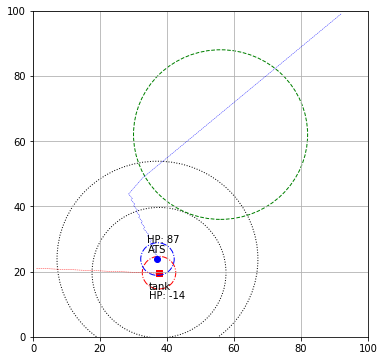

In [4]:
tank = tank_()
ATS = ATS_()
battlefiend = battlefiend_()
battlefiend.create_geom()
figth = figth_(tank, ATS, battlefiend)
figth.generate_data()
figth.generate_waypoint()

figth.simulate()
figth.plot()